# Feature Engineering Techniques

In [4]:
data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
data.head()

<IPython.core.display.Javascript object>

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


# Checking for number of unique labels in each column

In [10]:
for col in data.columns:
    print(col,": ",len(data[col].unique()), 'labels')

X1 :  27 labels
X2 :  44 labels
X3 :  7 labels
X4 :  4 labels
X5 :  29 labels
X6 :  12 labels


In [11]:
pd.get_dummies(data, drop_first=True) ## Not a good way as 117 columns are created, which leads to the curse of dimensionality 

<IPython.core.display.Javascript object>

,X1_aa,X1_ab,X1_b,X1_c,X1_d,X1_e,X1_f,X1_g,X1_h,X1_i,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Lets find the top 10 most frequent categories for the variable x2
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [14]:
data.X2.value_counts().sort_values(ascending=False).head(20).index

Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e', 'aq', 'ay', 'a',
       't', 'i', 'k', 'b', 'ao', 'ag', 'z'],
      dtype='object')

In [16]:
# Now lets make a list with the most frequent categories of the variable
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [17]:
# Now we make the 10 binary variables

for label in top_10:
    data[label] = np.where(data['X2']==label, 1, 0)
data[['X2']+top_10].head(40)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [20]:
# Now get Whole set of dummy variables, for all categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # Function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        data[variable+"_"+label] = np.where(df[variable]==label, 1, 0)
    
#Reading the data again
data = pd.read_csv('mercedesbenz.csv', usecols=['X1','X2','X3','X4','X5','X6'])

# Encode the X2 into the 10 most frequent categories
one_hot_top_x(data, 'X2', top_10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


# Handling categorical Features (Count/ Frequency Encoding)

### One Approach that is heavily used in kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in a dataset or the frequency, this is the percentage of observations within that category

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [2]:
df.shape

(4209, 2)

# One hot encoding

In [4]:
pd.get_dummies(df).shape

(4209, 71)

In [5]:
len(df['X1'].unique())

27

In [6]:
len(df['X2'].unique())

44

In [7]:
# Let's have a look at how many labels

for col in df.columns[0:]:
    print(col,":", len(df[col].unique()), 'labels')

X1 : 27 labels
X2 : 44 labels


In [10]:
# Let's obtain the counts for each one of the labels in variable X2
# Let's capture this in a dictonary that we can use to re-map the lables
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'h': 6,
 'at': 6,
 'al': 5,
 'an': 5,
 'q': 5,
 'ah': 4,
 'p': 4,
 'av': 4,
 'au': 3,
 'l': 1,
 'j': 1,
 'c': 1,
 'ar': 1,
 'o': 1,
 'am': 1,
 'aa': 1,
 'af': 1}

In [11]:
# And now let's replace each label in X2 by its count

# First we make a dictionary that maps each label to the counts
df_frequency_map = df.X2.value_counts().to_dict()

In [12]:
# And now we replace X2 labels in the dataset df
df.X2 = df.X2.map(df_frequency_map)

In [14]:
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


# There are some advantages and disadvantages that we will discuss now

#### Advantages
1.It is very simple to implement <br>
2. Does not increase the feature dimensional space
#### Disadvantages
1.If some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.<br>
2. Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

Follow this thread in Kaggle for more information: https://www.kaggle.com/general/16927

# How to handle ordinal categories(Ordinal Encoding) or Label Encoding

When the categorical variables are ordinal, the most straightforward best approach is to replace the labels by some ordinal number based on the ranks

In [20]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 20 days difference from today
# and then transform it into a datafame

import datetime
df_base = datetime.datetime.today()
df_date_list=[df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2020-11-18 12:52:21.510258
1,2020-11-17 12:52:21.510258
2,2020-11-16 12:52:21.510258
3,2020-11-15 12:52:21.510258
4,2020-11-14 12:52:21.510258
5,2020-11-13 12:52:21.510258
6,2020-11-12 12:52:21.510258
7,2020-11-11 12:52:21.510258
8,2020-11-10 12:52:21.510258
9,2020-11-09 12:52:21.510258


In [22]:
# Extract the week day name
df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2020-11-18 12:52:21.510258,Wednesday
1,2020-11-17 12:52:21.510258,Tuesday
2,2020-11-16 12:52:21.510258,Monday
3,2020-11-15 12:52:21.510258,Sunday
4,2020-11-14 12:52:21.510258,Saturday


In [23]:
# Engineer categorical variable by ordinal number replacement
weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2020-11-18 12:52:21.510258,Wednesday,3
1,2020-11-17 12:52:21.510258,Tuesday,2
2,2020-11-16 12:52:21.510258,Monday,1
3,2020-11-15 12:52:21.510258,Sunday,7
4,2020-11-14 12:52:21.510258,Saturday,6
5,2020-11-13 12:52:21.510258,Friday,5
6,2020-11-12 12:52:21.510258,Thursday,4
7,2020-11-11 12:52:21.510258,Wednesday,3
8,2020-11-10 12:52:21.510258,Tuesday,2
9,2020-11-09 12:52:21.510258,Monday,1


Ordinal Measurement Advantages
Ordinal measurement is normally used for surveys and questionnaires. Statistical analysis is applied to the responses once they are collected to place the people who took the survey into the various categories. The data is then compared to draw inferences and conclusions about the whole surveyed population with regard to the specific variables. The advantage of using ordinal measurement is ease of collation and categorization. If you ask a survey question without providing the variables, the answers are likely to be so diverse they cannot be converted to statistics.

With Respect to Machine Learning

Keeps the semantical information of the variable (human readable content)
Straightforward
Ordinal Measurement Disadvantages
The same characteristics of ordinal measurement that create its advantages also create certain disadvantages. The responses are often so narrow in relation to the question that they create or magnify bias that is not factored into the survey. For example, on the question about satisfaction with the governor, people might be satisfied with his job performance but upset about a recent sex scandal. The survey question might lead respondents to state their dissatisfaction about the scandal, in spite of satisfaction with his job performance -- but the statistical conclusion will not differentiate.

With Respect to Machine Learning

Does not add machine learning valuable information

# Handling missing values
1] continuous data<br>
2] categorical data

### What are the different types of Missing Data?
##### 1.  Missing Completely at Random,
MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
# here the missing values are not MCAR because there is some relationship
# between the data
# embarked column is MCAR

In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2. Missing Data Not At Random(MNAR): Systematic missing values
There is absolutely some relationship between the data missing and any other values, observed or missing within the dataset

In [10]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

#find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [12]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### 3.Missing At Random(MAR)

Men -- hide their salary<br>
Women -- hide their age

### All the Techniques of handling missing values
1. Mean/ Medain/ Mode replacement<br>
2. Random Sample Imputation<br>
3. Capturing NAN values with a new feature<br>
4. End of Distribution imputation<br>
5. Arbitrary imputation<br>
6. Frequent categories imputation


#### 1.Mean/ Medain/Mode Imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR).<br> We solve this by replacing the NAN with the most frequent occurance of the variables.

In [13]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
def impute_nan(df, variable, median):
    df[variable+"_median"]=df[variable].fillna(median)

In [16]:
median = df.Age.median()
median

28.0

In [17]:
impute_nan(df, 'Age', median)

In [18]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
df['Age'].std()

14.526497332334044

In [20]:
df['Age_median'].std()

13.019696550973194

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

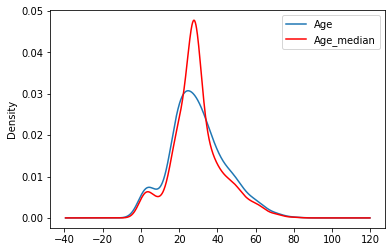

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages and Disadvantages of Mean/ Median Imputation

#### Advantages
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
3. Change or Distortion in the original variance

#### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values
<br><br>
When should it be used?<br>
It assumes that the data are missing completely at random(MCAR)


In [23]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
df.isnull().mean() # percentage of null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [26]:
df['Age'].dropna().sample()

245    44.0
Name: Age, dtype: float64

In [32]:
df['Age'].isnull().sum()

177

In [34]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [35]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [36]:
def impute_nan(df, variable, median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    ## pandas need to have same index in order to merge the dataset 
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [37]:
median=df['Age'].median()
median

28.0

In [38]:
impute_nan(df, "Age", median)

In [39]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


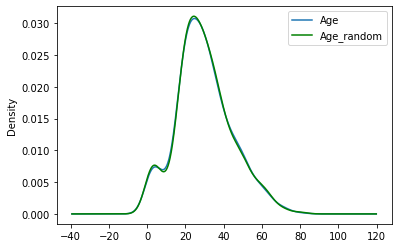

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

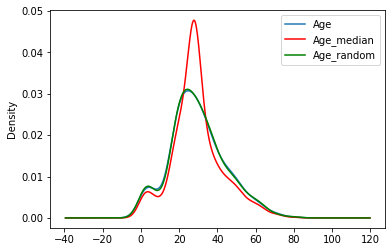

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy To implement<br>
2. There is no distortion in varaince

#### Disadvantages
1. In every situation randomness wont work

### 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [43]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [45]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantage
1. Creating Additional Features which might lead to (Curse of Dimensionality)

### 4. End of Distribution imputation

In [46]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

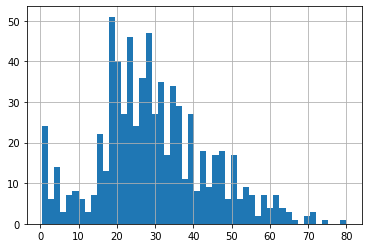

In [47]:
df.Age.hist(bins=50)

In [50]:
extreme = df.Age.mean()+3*df.Age.std()

<AxesSubplot:xlabel='Age'>

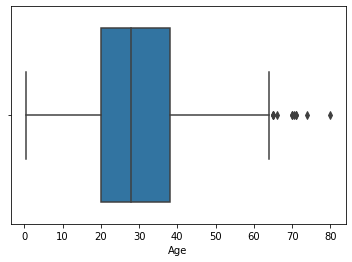

In [49]:
import seaborn as sns # outliers detection
sns.boxplot('Age',data=df)

In [51]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [53]:
median = df.Age.median()
median

28.0

In [56]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [59]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

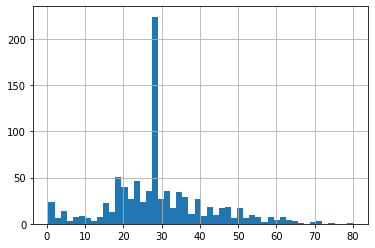

In [60]:
df['Age'].hist(bins=50)

<AxesSubplot:>

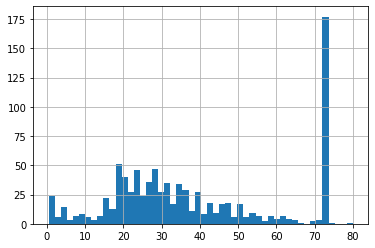

In [61]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

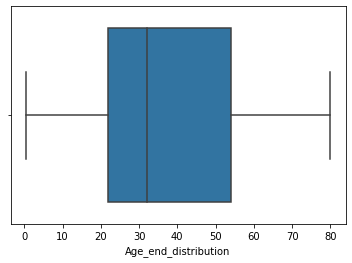

In [63]:
sns.boxplot('Age_end_distribution', data=df)  ## Now there are no outliers on the rhs

#### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

#### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsuquent feature engineering.

#### 5. Arbitrary Value Imputation (Less used)
This technique was derived from kaggle competition<br>
It consists of replacing NAN by arbitrary value

In [1]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

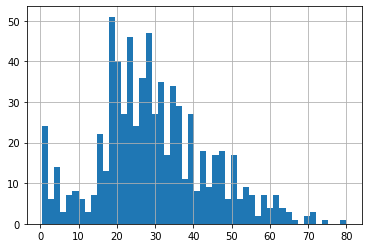

In [3]:
df['Age'].hist(bins=50)

#### Arbitrary values
#### 1. It should not be more frequently present
##### Advantages
- Easy to implement
- Captures the importance of missingess if there is one
##### Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

#### How to Handle Categorical Missing Values
#### 1. Frequent Category Imputation

In [3]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.shape

(1460, 4)

In [5]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [6]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [7]:
## finding the percentage of missing values
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

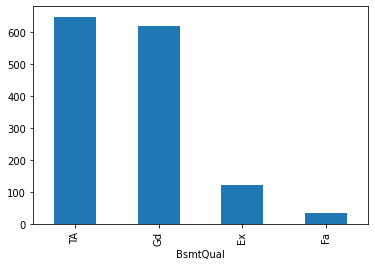

In [9]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [10]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

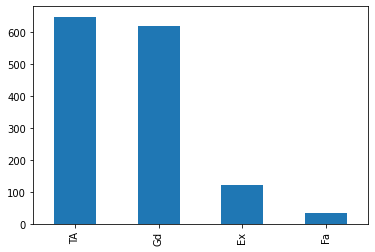

In [11]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

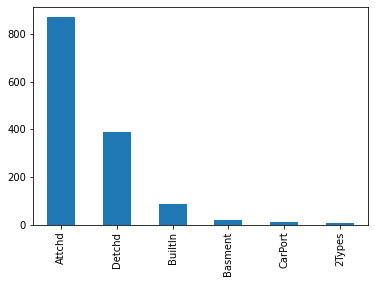

In [12]:
# Now lets look at garagetype column
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

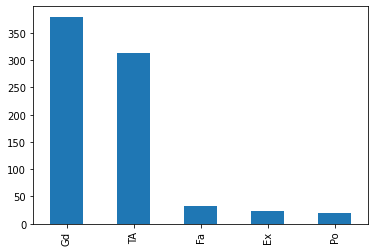

In [13]:
df['FireplaceQu'].value_counts().plot.bar()

In [14]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [15]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.isnull().mean()  ##No null values

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
- Easy to implement
- Faster way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over represented way if there are many NANs
2. It distorts the relation of the most frequent labels

### 2. Adding a variable to capture NAN

In [19]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [20]:
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(), 1,0)

<IPython.core.display.Javascript object>

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [24]:
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent, inplace=True)

In [25]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_Var      0
dtype: int64

In [26]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(), 1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

<IPython.core.display.Javascript object>

In [27]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [29]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [30]:
def impute_nan(df, variable):
    df[variable+"_newvar"] = np.where(df[variable].isnull(),'Missing', df[variable])

In [31]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [34]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1,inplace=True)

In [35]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [41]:
active_imports()

import pandas as pd
import numpy as np


['import pandas as pd', 'import numpy as np']

### Handling Categorical Features
#### 1.One Hot Encoding

In [36]:
df = pd.read_csv('titanic.csv', usecols=['Sex'])

<IPython.core.display.Javascript object>

In [37]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [40]:
pd.get_dummies(df, drop_first=True)  ## To avoid dummy variable trap

<IPython.core.display.Javascript object>

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
df = pd.read_csv('titanic.csv', usecols=['Embarked'])

<IPython.core.display.Javascript object>

In [43]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
df.dropna(inplace=True)

In [46]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [47]:
pd.get_dummies(df, drop_first=False)

<IPython.core.display.Javascript object>

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### One hot encoding with many categories in a feature

In [51]:
df=pd.read_csv('mercedesbenz.csv', usecols=['X0','X1','X2','X3','X4','X5','X6'])

<IPython.core.display.Javascript object>

In [52]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [53]:
for i in df.columns:
    print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
k      11
au     11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ab      1
ac      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
q       3
d       3
ab      3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z    

In [54]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [55]:
# Considering the top ten in every feature
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [57]:
list_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
list_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [58]:
for categories in list_10:
    df[categories]=np.where(df['X1']==categories,1,0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


## Ordinal Number Encoding

In [1]:
import datetime

In [5]:
today_date = datetime.datetime.today()

In [6]:
today_date

datetime.datetime(2020, 11, 28, 23, 9, 59, 148095)

In [8]:
today_date-datetime.timedelta(1)

datetime.datetime(2020, 11, 27, 23, 9, 59, 148095)

In [9]:
### List comprehension
[today_date-datetime.timedelta(x) for x in range(0,15)]

[datetime.datetime(2020, 11, 28, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 27, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 26, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 25, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 24, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 23, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 22, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 21, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 20, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 19, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 18, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 17, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 16, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 15, 23, 9, 59, 148095),
 datetime.datetime(2020, 11, 14, 23, 9, 59, 148095)]

In [10]:
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [11]:
data = pd.DataFrame(days)

<IPython.core.display.Javascript object>

In [12]:
data.head()

,0
0,2020-11-28 23:09:59.148095
1,2020-11-27 23:09:59.148095
2,2020-11-26 23:09:59.148095
3,2020-11-25 23:09:59.148095
4,2020-11-24 23:09:59.148095


In [14]:
data.columns=['Day']

In [16]:
data['weekday'] = data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2020-11-28 23:09:59.148095,Saturday
1,2020-11-27 23:09:59.148095,Friday
2,2020-11-26 23:09:59.148095,Thursday
3,2020-11-25 23:09:59.148095,Wednesday
4,2020-11-24 23:09:59.148095,Tuesday


In [17]:
dictonary = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5,'Saturday':6, 'Sunday':7}

In [18]:
dictonary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [21]:
data['weekday_ordinal']=data['weekday'].map(dictonary)

In [22]:
data.head()

,Day,weekday,weekday_ordinal
0,2020-11-28 23:09:59.148095,Saturday,6
1,2020-11-27 23:09:59.148095,Friday,5
2,2020-11-26 23:09:59.148095,Thursday,4
3,2020-11-25 23:09:59.148095,Wednesday,3
4,2020-11-24 23:09:59.148095,Tuesday,2


### Count Or Frequency Encoding

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,index_col=None) 
train_set.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
columns=[1,3,5,6,7,8,9,13]

In [4]:
train_set[columns]

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [5]:
train_set = train_set[columns]

In [6]:
train_set.columns=['Employement','Degree','Status', 'Designation', 'family_job', 'Race', 'Sex', 'Country']

In [7]:
train_set.head()

,Employement,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [8]:
for feature in train_set.columns:
    print(feature+":", len(train_set[feature].unique()), 'labels')

Employement: 9 labels
Degree: 16 labels
Status: 7 labels
Designation: 15 labels
family_job: 6 labels
Race: 5 labels
Sex: 2 labels
Country: 42 labels


In [11]:
country_map = train_set['Country'].value_counts().to_dict()

In [12]:
train_set['Country']=train_set['Country'].map(country_map)

In [13]:
train_set.head(10)

,Employement,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


#### Advantages
1. Easy to use
2. Not increasing any feature space
#### Disadvantages
1. It will provide same weight if the frequencies are same

## Target Guided ordinal encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [14]:
df = pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [16]:
df['Cabin'].fillna('Missing', inplace=True)

In [17]:
df.head(10)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [18]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [19]:
df.head(20)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [22]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [23]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [24]:
ordinal_labels =df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [26]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels, 0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [27]:
df['Cabin_ordinal_lables'] = df['Cabin'].map(ordinal_labels2)

In [28]:
df.head()

,Survived,Cabin,Cabin_ordinal_lables
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Mean Encoding

In [30]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [31]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [32]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)

In [33]:
df.head(10)

,Survived,Cabin,Cabin_ordinal_lables,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
5,0,M,1,0.299854
6,0,E,7,0.750000
7,0,M,1,0.299854
8,1,M,1,0.299854
9,1,M,1,0.299854


## Probability Ratio Encoding
1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not survived ---1-pr(Survived)
3. pr(survived)/pr(not survived)
4. Dictionary to map cabin with probability
5. Replace with the categorical feature

In [35]:
df = pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])

<IPython.core.display.Javascript object>

In [36]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [37]:
df['Cabin'].fillna('Missing',inplace=True)

In [38]:
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [39]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [40]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)

<IPython.core.display.Javascript object>

In [46]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [47]:
prob_df['Dead'] =1-prob_df['Survived']

In [48]:
prob_df.head()

,Survived,Dead
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [49]:
prob_df['Probability_Ratio'] = prob_df['Survived']/prob_df['Dead']

In [50]:
prob_df

,Survived,Dead,Probability_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [51]:
probability_encoded = prob_df['Probability_Ratio'].to_dict()

In [52]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)

In [53]:
df

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
...,...,...,...
886,0,M,0.428274
887,1,B,2.916667
888,0,M,0.428274
889,1,C,1.458333


### Transformation
Why Transformation of Features Are required?
1. Linear Regression---Gradient Descent ---Global Minima
2. Algorithms like KNN, K Means, Hierarichal Clustering--- Eucledian Distance
Every Point has some vectors and Direction<br>
Deep Learning Techniques(Standardization, Scaling)
1. ANN---> Global Minima, Gradient
2. CNN
3. RNN
0-255

### Types of Transformation
1. Normalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quantiles
4. Gaussian Transformation<br>
    -> Logarthmic Transformation<br>
    -> Reciprocal Transformation<br>
    -> Square root Transformation<br>
    -> Exponential Transformation<br>
    -> Box Cox Transformation

### Standardization
We try to bring all the variables or features to a similar scale. Standardization means centering the variable at zero. z=(x-x_mean)/std

In [1]:
df = pd.read_csv('titanic.csv', usecols=['Pclass', 'Age', 'Fare','Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [3]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [4]:
## standardization: We use the StandardScalar from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [6]:
pd.DataFrame(df_scaled)

<IPython.core.display.Javascript object>

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


<IPython.core.display.Javascript object>

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

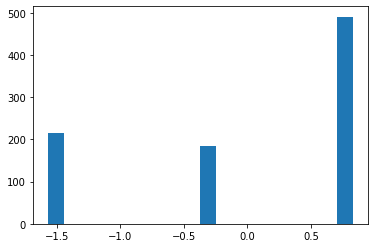

In [7]:
plt.hist(df_scaled[:,1], bins=20)

<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

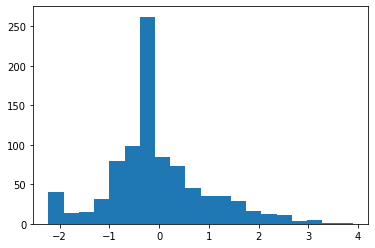

In [8]:
plt.hist(df_scaled[:,2], bins=20)

<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

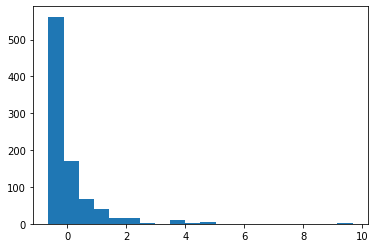

In [9]:
plt.hist(df_scaled[:,3], bins=20)

### Minmax Scaling  (CNN) in deep learning techniques
1. Scales the values between 0 to 1.<br>
X_scaled = (X-X.min/(X.max-X.min))

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_minmax.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


### Robust Scalar
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_robust.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


<IPython.core.display.Javascript object>

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

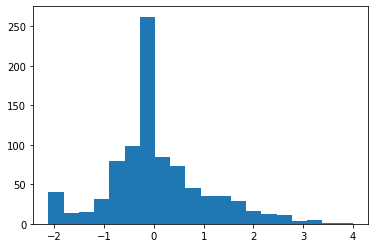

In [15]:
plt.hist(df_robust['Age'], bins=20)

<IPython.core.display.Javascript object>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

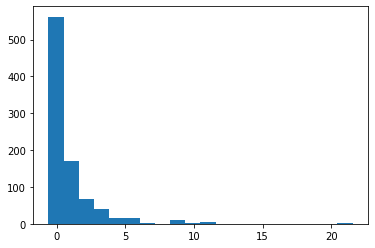

In [16]:
plt.hist(df_robust['Fare'], bins=20)

## Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance
<br>
logarithmic transformation<br>
reciprocal transformation<br>
square root transformation<br>
exponential transformation (more general, you can use any exponent)<br>
boxcox transformation

In [13]:
df = pd.read_csv('titanic.csv', usecols=['Pclass', 'Age', 'Fare','Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [16]:
import scipy.stats as stat
import pylab

In [17]:
# If you want to check whether a feature is gaussian or normal distribution  (Q-Q plot)
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

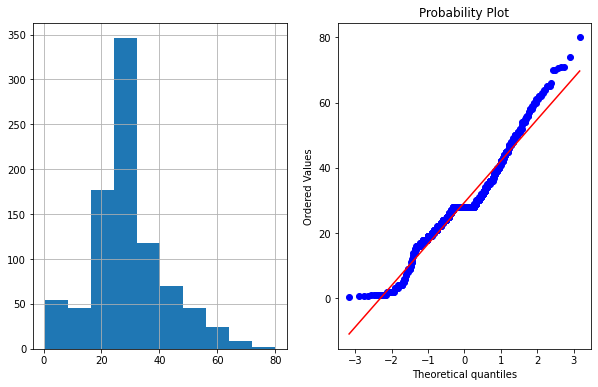

In [18]:
plot_data(df, 'Age')

## Logarthmic Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

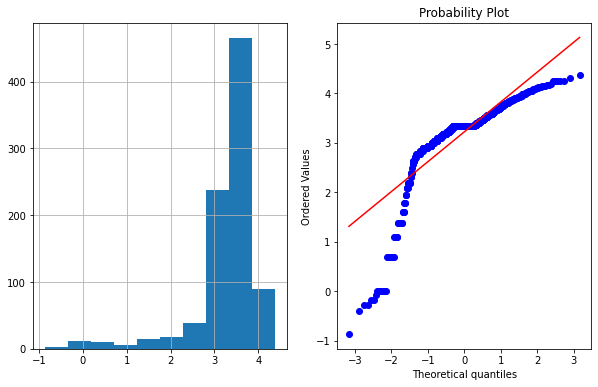

In [19]:
df['Age_log'] = np.log(df['Age'])
plot_data(df, 'Age_log')

## Reciprocal Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

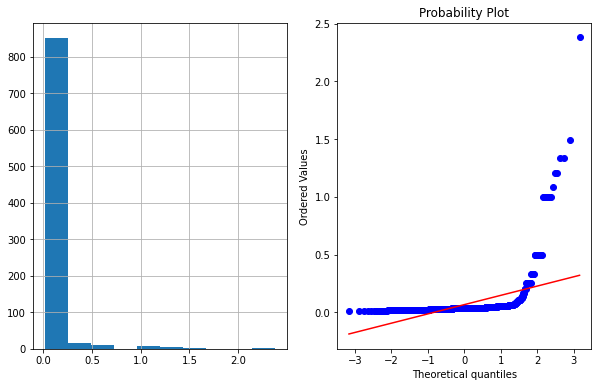

In [20]:
df['Age_reciprocal']=1/df['Age'] # checking for normal distribution. But all the points are not on the straight line so not normally distributed.
plot_data(df, 'Age_reciprocal')

## Square Root Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

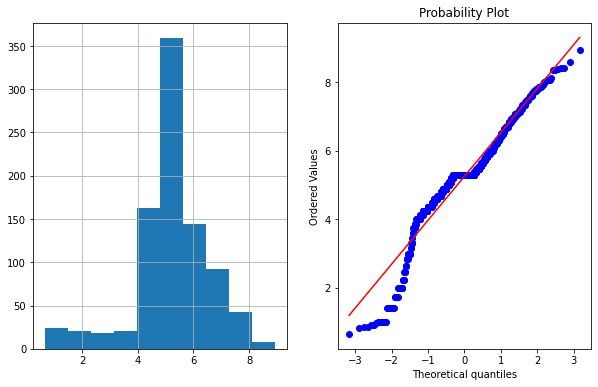

In [21]:
df['Age_square'] = df.Age**(1/2)
plot_data(df, 'Age_square')

## Exponential Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

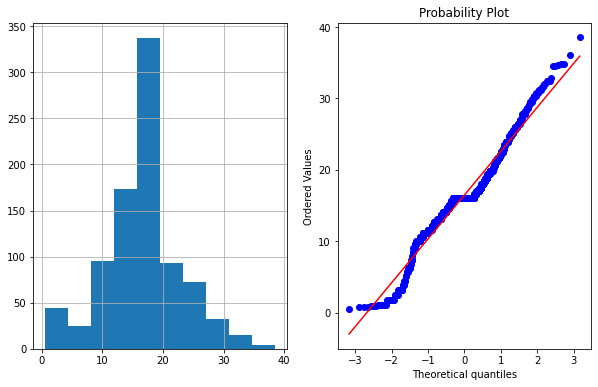

In [22]:
df['Age_exponential'] = df.Age**(1/1.2)
plot_data(df, 'Age_exponential')

## BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [23]:
df['Age_boxcox'] , parameters = stat.boxcox(df['Age'])

In [24]:
print(parameters)

0.7964531473656952


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

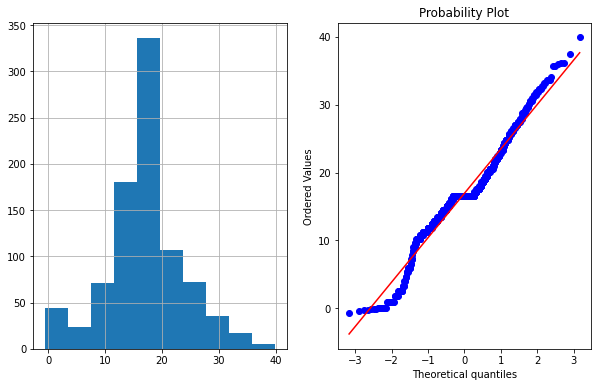

In [25]:
plot_data(df, 'Age_boxcox')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

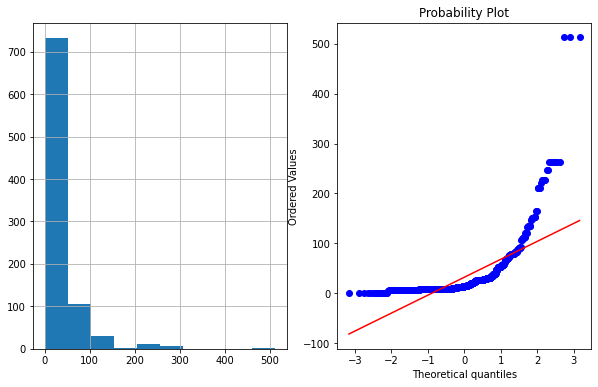

In [26]:
plot_data(df,'Fare')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

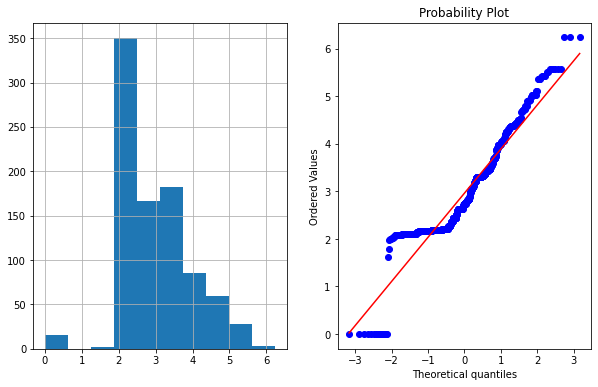

In [27]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

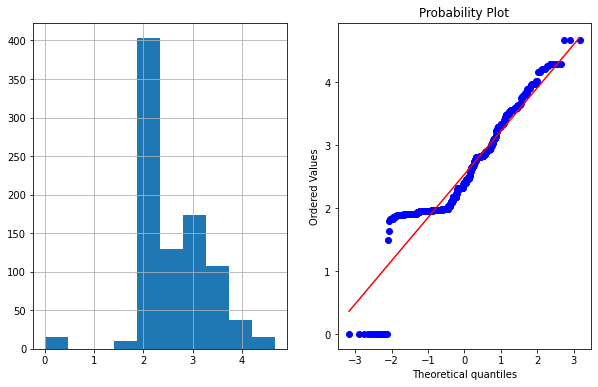

In [28]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')

In [29]:
## By using boxcox transform also we can transform to gaussian distribution

## Handling imbalanced dataset with machine learning

In [1]:
df = pd.read_csv('creditcard.csv')

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.unique()

array([0, 1], dtype=int64)

In [8]:
df['Class'].value_counts() #There is a huge difference between the class 0 and 1

0    284315
1       492
Name: Class, dtype: int64

In [3]:
# Independent and Dependent Features
X = df.drop(['Class'], axis=1)
y = df.Class

## Cross validation like KFold and Hyper parameter Tuning

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV

In [15]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1', 'l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)

<IPython.core.display.Javascript object>

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [17]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1,scoring='f1_macro')
clf.fit(X_train, y_train)

C:\Users\saini\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [18]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85275    32]
 [   43    93]]
0.9991222218320986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.68      0.71       136

    accuracy                           1.00     85443
   macro avg       0.87      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [22]:
class_weight = dict({0:1, 1:100}) # Gives 100 times more importance to '1' when compared to label '0' as the no of 1's are less

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [25]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85302     5]
 [   27   109]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## UnderSampling

In [6]:
# Under sampling -- reduce the points of the maximum labels
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_sample(X_train, y_train)

C:\Users\saini\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [7]:
from collections import Counter
Counter(y_train)

Counter({0: 199008, 1: 356})

In [8]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 445, 1: 356})


In [9]:
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

<IPython.core.display.Javascript object>

RandomForestClassifier()

In [12]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57411 27896]
 [    7   129]]
0.6734314104139602
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     85307
           1       0.00      0.95      0.01       136

    accuracy                           0.67     85443
   macro avg       0.50      0.81      0.41     85443
weighted avg       1.00      0.67      0.80     85443



In [13]:
# Clearly the undersampling doesnt work here

In [18]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)

C:\Users\saini\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [19]:
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 199008, 1: 149256})


In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [21]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85303     4]
 [   26   110]]
0.9996488887328394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.81      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
from imblearn.combine import SMOTETomek

In [23]:
os=SMOTETomek(0.5)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\saini\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 198192, 1: 98688})


In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [25]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85284    23]
 [   18   118]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## Ensemble Techniques

In [26]:
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier()
easy.fit(X_train, y_train)

EasyEnsembleClassifier()

In [27]:
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[81871  3436]
 [    7   129]]
0.9597041302388727
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.95      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.52     85443
weighted avg       1.00      0.96      0.98     85443

